# Logistic Regression(with feature engineering)

Any player who has never competed in an NBA game prior to that year is considered a rookie in the league. The NBA presents the NBA Rookie of the Year Award to the top rookie at the conclusion of the regular season.A basketball player's transition to the NBA is a significant event. The beginning of their careers is something that sports analysts and fans eagerly anticipate to monitor and predict how they will perform in the future.This notebook will use Logistic Regression to predict whether or not a player will last five years in the league based on his stats.

The steps are:
1. Load Data
2. Data Cleaning and Exploration
3. Train LR Classifier
4. Evaluation
5. Feature importance
6. Prediction

In [12]:
import pandas as pd
import numpy as np
import shap
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Qt5Agg') 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [13]:
cd /Users/frodo/Downloads/36114/project/adv_dsi_ass_1

/Users/frodo/Downloads/36114/project/adv_dsi_ass_1


## 1. Load data

In [18]:
import os

In [19]:
os.getcwd()

'/Users/frodo/Downloads/36114/project/adv_dsi_ass_1'

In [24]:
#Load the dataset
df = pd.read_csv("/data/raw/nba_train.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/data/raw/nba_train.csv'

### Display the first 5 rows of train data

In [15]:
df.head()

NameError: name 'df' is not defined

### Display the shape of train data

In [4]:
df.shape

(8000, 21)

There are 8000 observations with 20 features,and there is no missing value in train dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           8000 non-null   int64  
 1   GP           8000 non-null   int64  
 2   MIN          8000 non-null   float64
 3   PTS          8000 non-null   float64
 4   FGM          8000 non-null   float64
 5   FGA          8000 non-null   float64
 6   FG%          8000 non-null   float64
 7   3P Made      8000 non-null   float64
 8   3PA          8000 non-null   float64
 9   3P%          8000 non-null   float64
 10  FTM          8000 non-null   float64
 11  FTA          8000 non-null   float64
 12  FT%          8000 non-null   float64
 13  OREB         8000 non-null   float64
 14  DREB         8000 non-null   float64
 15  REB          8000 non-null   float64
 16  AST          8000 non-null   float64
 17  STL          8000 non-null   float64
 18  BLK          8000 non-null   float64
 19  TOV   

In [6]:
df.isna().any()

Id             False
GP             False
MIN            False
PTS            False
FGM            False
FGA            False
FG%            False
3P Made        False
3PA            False
3P%            False
FTM            False
FTA            False
FT%            False
OREB           False
DREB           False
REB            False
AST            False
STL            False
BLK            False
TOV            False
TARGET_5Yrs    False
dtype: bool

In [7]:
df.isnull().any()

Id             False
GP             False
MIN            False
PTS            False
FGM            False
FGA            False
FG%            False
3P Made        False
3PA            False
3P%            False
FTM            False
FTA            False
FT%            False
OREB           False
DREB           False
REB            False
AST            False
STL            False
BLK            False
TOV            False
TARGET_5Yrs    False
dtype: bool

## 2.Data Cleaning and Exploration

We will do data cleaning and data exploration simultaneously because data exploration often goes hand in hand with data cleaning processes in our experiment

### Description of data

In [8]:
df.describe()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,7798.50000,62.777875,18.576662,7.267088,2.807037,6.231212,44.608900,0.264525,0.816562,19.583700,...,1.947788,71.365825,1.077838,2.168500,3.245300,1.624513,0.648687,0.245212,1.257763,0.833625
std,2309.54541,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,16.003155,...,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,3799.00000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,-38.500000,...,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,5798.75000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,8.400000,...,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,7798.50000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,19.500000,...,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,9798.25000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,30.600000,...,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,11798.00000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,82.100000,...,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


We can see there are some negative values in our dataset, but negative values are usually not present in this case, we may handle this problem in the data preprocess step

### Compare the average statistics between positive group and negative group

In [9]:
# Grouping all observations by target variable
stats = df.groupby(['TARGET_5Yrs']).mean()
stats_transposed = stats.T
stats_transposed

TARGET_5Yrs,0,1
Id,7764.149512,7805.355676
GP,53.501127,64.629330
MIN,14.932682,19.303929
PTS,5.507739,7.618219
FGM,2.111270,2.945899
FGA,4.928325,6.491243
FG%,42.420210,45.045719
3P Made,0.251615,0.267102
3PA,0.808340,0.818204
3P%,20.012697,19.498081


In [10]:
# correlation between the target variable and independent variables
df.corr()['TARGET_5Yrs'].sort_values(ascending = False)

TARGET_5Yrs    1.000000
GP             0.242108
FGM            0.183568
MIN            0.182203
PTS            0.182004
FTA            0.176525
REB            0.175627
FTM            0.173913
OREB           0.172604
DREB           0.168065
FGA            0.162389
FG%            0.158858
TOV            0.151240
STL            0.128381
BLK            0.098642
AST            0.096771
FT%            0.039429
3P Made        0.015016
Id             0.006645
3PA            0.003463
3P%           -0.011977
Name: TARGET_5Yrs, dtype: float64

### Define X and Y

In [11]:
# Extract the target variable into a variable called y
y = df.pop('TARGET_5Yrs')

# Set the index of a DataFrame called 'df_cleaned' to the values of the column 'Id'.
df = df.set_index(['Id'])

In [12]:
df

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
Id,,,,,,,,,,,,,,,,,,,
3799,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,2.0,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6
3800,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,2.4,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4
3801,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,0.4,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6
3802,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,0.9,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9
3803,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,0.2,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11794,32,9.2,1.8,0.7,1.8,40.3,-0.1,-0.2,23.1,0.4,0.6,65.7,0.3,1.8,1.9,0.5,0.3,0.2,0.4
11795,54,6.0,1.8,0.7,1.4,48.7,0.1,0.1,3.1,0.2,0.4,70.1,1.0,1.1,2.0,0.1,0.0,0.3,0.3
11796,85,28.2,10.7,4.0,9.0,45.1,0.2,0.6,23.6,2.8,3.9,69.7,1.0,2.1,3.1,3.4,1.2,0.2,1.8


### Distribution of Y

In [13]:
y.value_counts()

1    6669
0    1331
Name: TARGET_5Yrs, dtype: int64

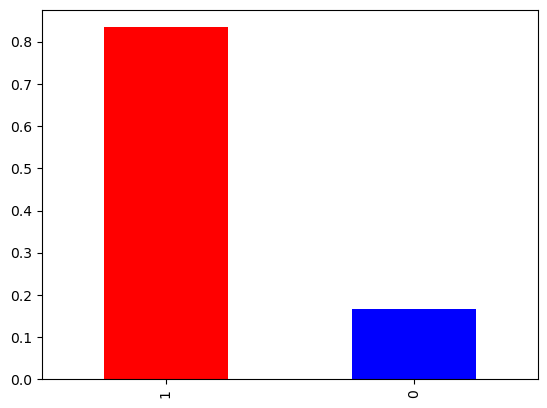

In [14]:
# Calculate positive and negative sample ratios
sizes = y.value_counts(normalize=True).plot(kind="bar", color=["red", "blue"])

### Correlation matrix

In [15]:
#Correlation matrix
corr_matrix = df.corr()

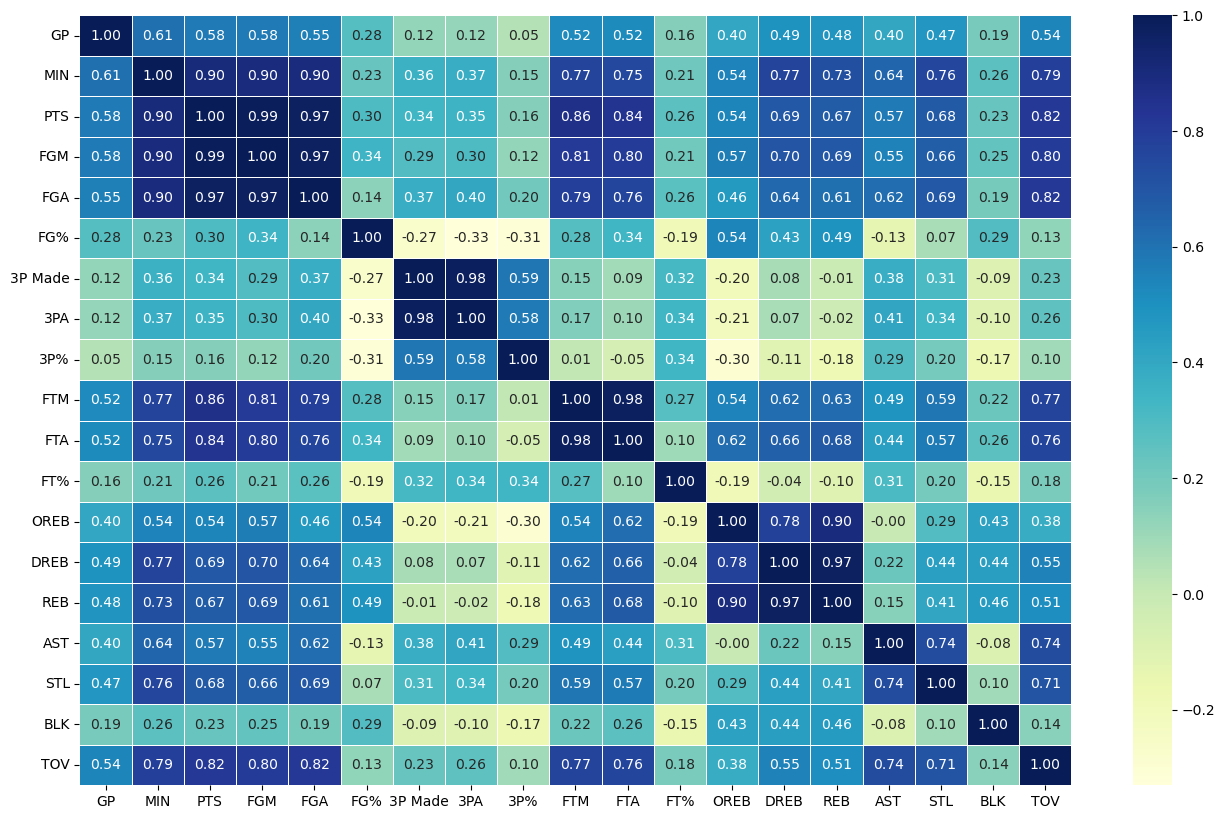

In [16]:
#plot heatmap
fig, ax = plt.subplots(figsize=(16,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

we delete following features: 'FGA', '3PA', 'FTA', 'DREB'

In [17]:
df_train=df.copy()

### Feature Engineering

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.features.add_features import FeatureGenerator

# Create an instance of the generator, passing in the DataFrame to process
generator = FeatureGenerator(df_train)

# Generate the features and get the processed DataFrame
df_train = generator.generate()

NameError: name 'df_train' is not defined

In [8]:
from src.features.customer_preprocessor import CustomPreprocessor

## 3. Train model

we generate a custompreprocessor ensure there is no negative value in our train dataset

In [10]:
from src.trainers.LR import Trainer

In [11]:
trainer = Trainer()
trainer.train(X_train, y_train, model_filename='LR_FE.joblib')

NameError: name 'X_train' is not defined

### Random Search

In [27]:
# Specify the parameter grid
rs_param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga']  # solvers that support both 'l1' and 'l2' penalties
}

# Create a RandomizedSearchCV instance with the pipeline and parameter grid
random_search = RandomizedSearchCV(pipeline, param_distributions=rs_param_grid, n_iter=10,
                                   scoring='roc_auc', cv=5, verbose=2, n_jobs=-1,
                                   error_score='raise', random_state=42)

# Fit the RandomizedSearchCV 
random_search.fit(X_train, y_train)

# Get the best parameters and score
rs_best_params = random_search.best_params_
rs_best_score = random_search.best_score_

print("Best Parameters:", rs_best_params)
print("Best Score:", rs_best_score)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'classifier__solver': 'liblinear', 'classifier__penalty': 'l2', 'classifier__C': 10}
Best Score: 0.7015967721354682


## 4. Evaluation on validation data

we applied the trained model on validation data to obtain model performance 

In [ ]:
from evaluation import Evaluator

In [28]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

### Classification Report

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.27      0.68      0.39       266
           1       0.91      0.63      0.75      1334

    accuracy                           0.64      1600
   macro avg       0.59      0.66      0.57      1600
weighted avg       0.80      0.64      0.69      1600



### Plot ROC curve

In [30]:
y_pred_proba = best_model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test,grid_search.best_estimator_.predict_proba(X_test)[:,1])

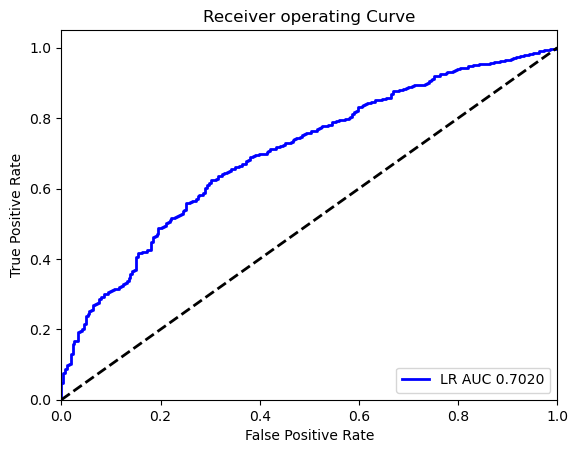

In [31]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label='LR AUC %0.4f' % auc, color='blue', lw = 2)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating Curve')
plt.legend(loc="lower right")
plt.show()

## 5.Feature importance

In [32]:
feature_importance = best_model.named_steps['classifier'].coef_
feature_names = X_train.columns.tolist()
result = dict(zip(feature_names, feature_importance[0]))

### Plot the feature importances

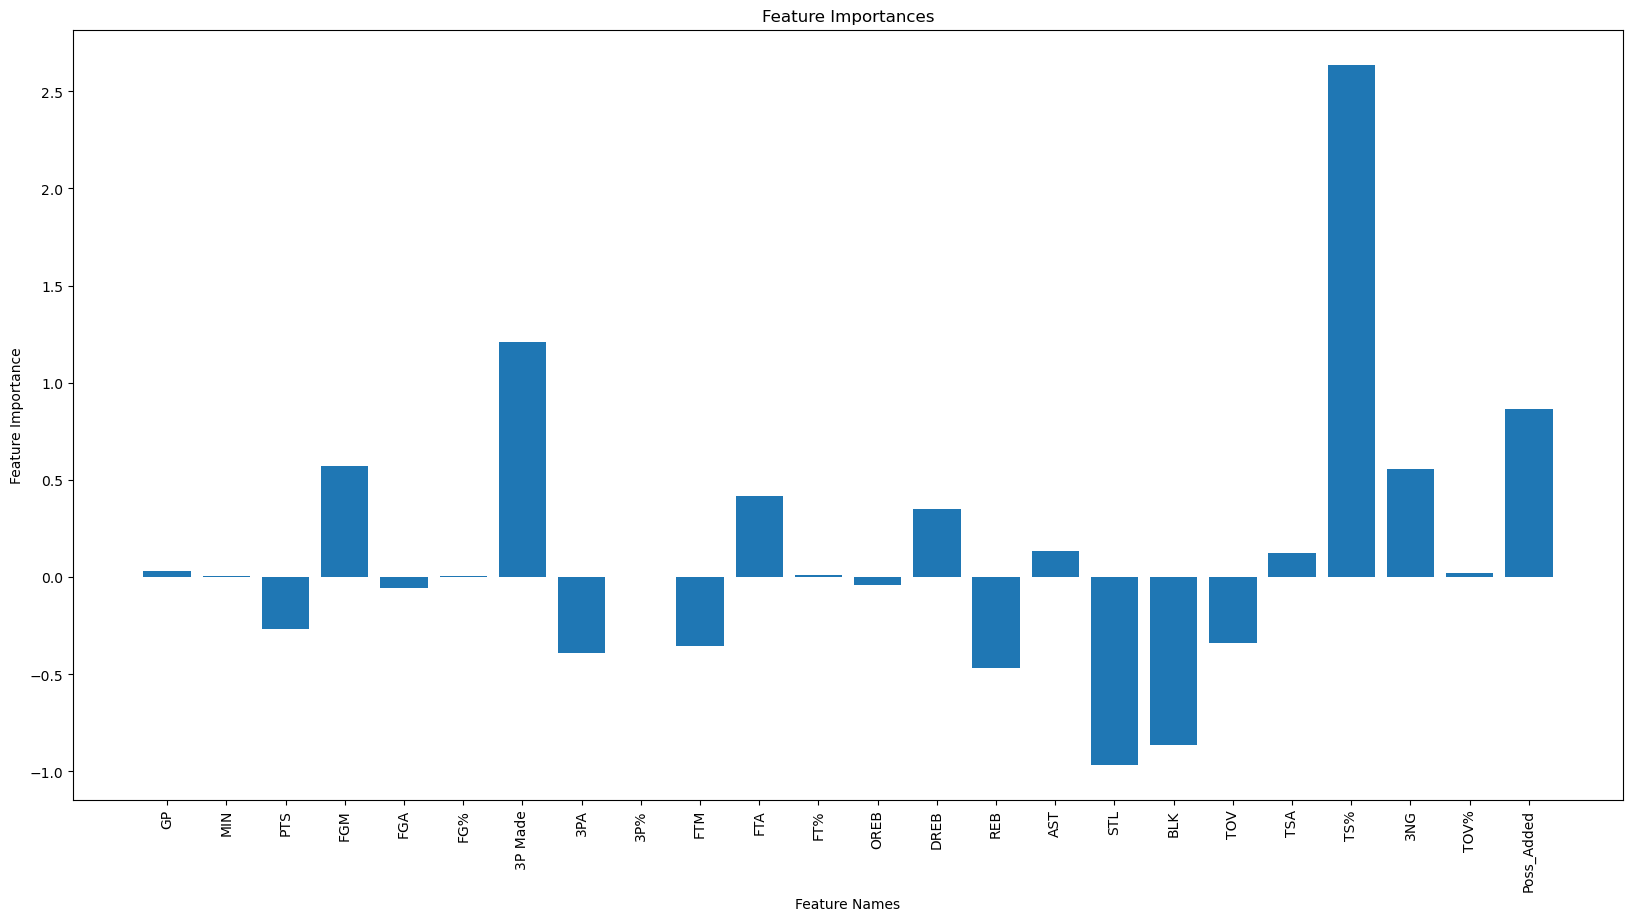

In [33]:
plt.figure(figsize=(20, 10))
plt.bar(np.arange(len(feature_importance[0])), feature_importance[0], align='center')
plt.xticks(np.arange(len(feature_importance[0])), feature_names, rotation=90)
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance')
plt.title('Feature Importances')
plt.show()

## 6.Prediction

Finally we applied the trained model on test data and upload our result to obtain score

### Load test data

In [34]:
#Load the dataset
df_test = pd.read_csv("nba_test.csv")
df_test = df_test.set_index(['Id'])

### Obtain predict value

In [35]:
# prediction
y_label = grid_search.best_estimator_.predict(df_test)
y_score = best_model.predict_proba(df_test)[:, 1]

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- 3NG
- Poss_Added
- TOV%
- TS%
- TSA
